In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import kagglehub

In [3]:

path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")


100%|██████████| 457/457 [00:00<00:00, 449kB/s]

Extracting files...


In [11]:
data = pd.read_csv(path+'//Salary_dataset.csv')
data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [12]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [13]:
data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)

In [14]:
data.set_index('Index', inplace=True)

In [15]:
data.head()

,YearsExperience,Salary
Index,,
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [17]:
YearsList = np.array(data['YearsExperience'])
SalaryList = np.array(data['Salary'])

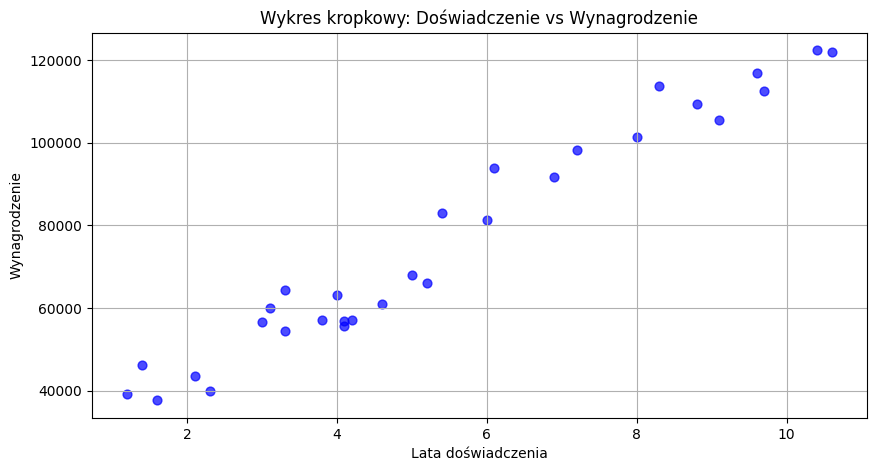

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(YearsList, SalaryList,color='blue',s=40,alpha=0.7)
plt.xlabel("Lata doświadczenia")
plt.ylabel("Wynagrodzenie")
plt.title("Wykres kropkowy: Doświadczenie vs Wynagrodzenie")
plt.grid(True)
plt.show()

In [24]:
YearsList = YearsList.reshape(-1, 1)
X = np.hstack((np.ones((YearsList.shape[0], 1)), YearsList))
YearsList

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [26]:
y = SalaryList.reshape(-1, 1)
X = np.hstack((np.ones((YearsList.shape[0], 1)), YearsList.reshape(-1, 1)))

theta = np.linalg.inv(X.T @ X) @ X.T @ y


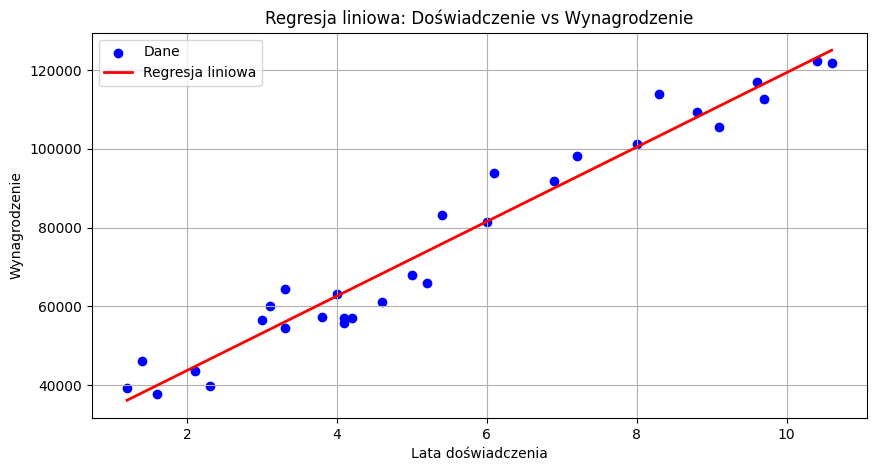

In [27]:
y_pred = X @ theta

plt.figure(figsize=(10, 5))
plt.scatter(YearsList, SalaryList, color='blue', label='Dane')
plt.plot(YearsList, y_pred, color='red', label='Regresja liniowa', linewidth=2)

plt.xlabel("Lata doświadczenia")
plt.ylabel("Wynagrodzenie")
plt.title("Regresja liniowa: Doświadczenie vs Wynagrodzenie")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
mse = np.mean((y-y_pred)**2)
print(f'''Average squared error: {mse:.2f}''')

Average squared error: 31270951.72


In [30]:
def predict_values(years, theta):
    return theta[0] + theta[1] * years

salary_5y = predict_values(5, theta)
print("Expected salary for person with 5y of experience: " + str(salary_5y[0]))


Expected salary for person with 5y of experience: 72098.01557379858
